In [1]:
import random
import math, time
import matplotlib.pyplot as plt
import numpy as np

## **PART 2**

In [ ]:
import pandas as pd

dist_net =pd.read_excel('/content/drive/MyDrive/Optimisation docs/project/Part 2 Data (2024).xlsx')

In [ ]:
dist_net.head()

,Unnamed: 0,X,Y,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Column for Python: TSP_GA.py,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,6.758599,24.101122,NaN,(,",",),"(6.75859879717907,24.1011220595671),",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,64.202021,21.278001,NaN,(,",",),"(64.2020211216308,21.2780005223912),",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3.282235,58.328059,NaN,(,",",),"(3.28223545665507,58.3280585995255),",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.356408,71.253598,NaN,(,",",),"(0.356408133450226,71.2535984441914),",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,47.541628,57.242195,NaN,(,",",),"(47.5416279589111,57.2421947321968),",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x_cord = list(dist_net['X'][0:25])
y_cord = list(dist_net['Y'][0:25])

### Population Random Search

Best Solution: [['W2', 1, 10, 4, 14, 'W2'], ['W1', 23, 17, 2, 11, 'W1'], ['W1', 20, 21, 18, 12, 'W1'], ['W2', 22, 3, 5, 9, 'W2'], ['W1', 6, 16, 15, 7, 'W1'], ['W2', 13, 19, 8, 'W2']]
Best Fitness (Total Cost): 1005.0
Vehicles at Warehouses:
Warehouse 24: 3 starting, 3 ending
Warehouse 25: 3 starting, 3 ending
Runtime =  approximately 7.0 mins


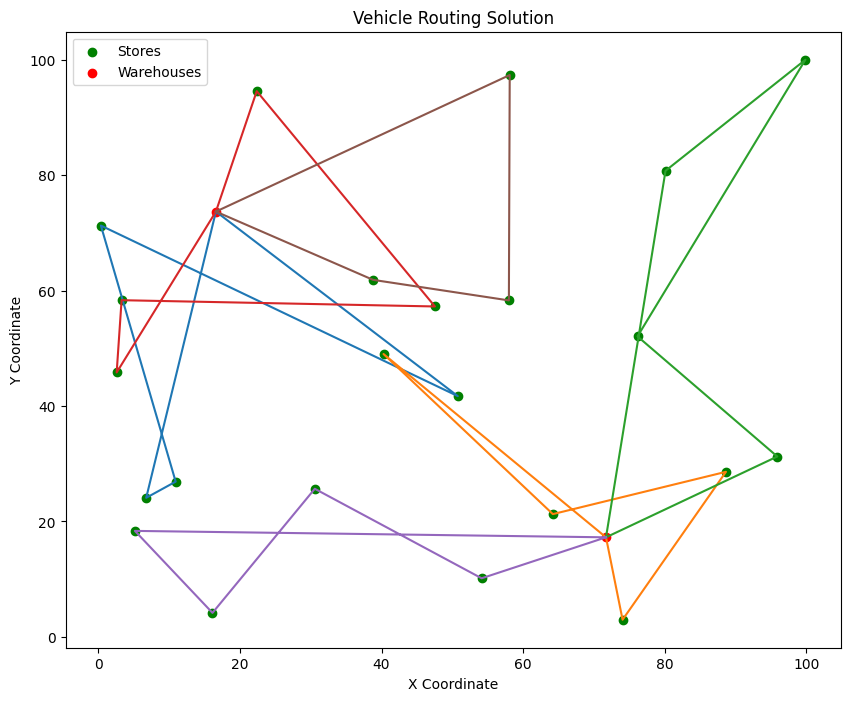

In [ ]:
start = time.time()
def calculate_distance_matrix(x_coords, y_coords):
    """
    Calculates the distance matrix between all pairs of coordinates.
    Args:
        x_coords (list): List of x coordinates
        y_coords (list): List of y coordinates.
    Returns:
            np.array: Distance matrix
    """
    coords = np.vstack((x_coords, y_coords)).T #Stack the coordinates into a matrix
    return np.round(np.sqrt((np.square(coords[:, np.newaxis] - coords).sum(axis=2)))) #A rounded figure of the sqrt of the pairwise squared distances

distance_matrix = calculate_distance_matrix(x_cord, y_cord)

def generate_random_solution(n_stores, vehicle_capacities, warehouse_indices):
    """
    Generates a random solution for the vehicle routing problem.
    Args:
        n_stores (int): Number of stores.
        vehicle_capacities (list): List of vehicle capacities.
        warehouse_indices (list): List of warehouse indices.
    Returns:
          list: List of vehicle routes.
    """
    stores = list(range(n_stores)) #Create a list of stores
    random.shuffle(stores) #Shuffle stores
    solution = [] #Create an empty list for vehicle routes
    for capacity in vehicle_capacities: #Iterate over the vehicle capacities
        for _ in range(n_stores // capacity): #Iterate over the number of vehicles with the given capacity
            start_warehouse = random.choice(warehouse_indices) #Choose a random starting warehouse
            end_warehouse = start_warehouse  # Set the ending warehouse to be the same as the starting warehouse
            vehicle_route = [start_warehouse] + stores[:capacity] + [end_warehouse] #Create a vehicle route with the starting warehouse, stores and ending warehouse
            stores = stores[capacity:] #Remove the stores from the list of stores
            if vehicle_route:
                solution.append(vehicle_route) #If the vehicle route is not empty, add it to the solution
    return solution

def calculate_fitness(solution, distance_matrix, vehicle_costs):
    """
    Calculates the fitness of a solution.
    Args:
        solution (list): List of vehicle routes.
        distance_matrix (np.array): Distance matrix.
        vehicle_costs (list): List of vehicle costs.
    Returns:
        float: Fitness value.
    """
    total_cost = 0 #Initialise total cost to 0
    for vehicle_route in solution:
        route_cost = 0 #Initialise route cost to 0
        vehicle_type = 0 if len(vehicle_route) <= 6 else 1 #Determine the vehicle type based on the length of the route
        if vehicle_route:
            for i in range(len(vehicle_route) - 1): #Calculate the distance traveled by the vehicle
                route_cost += distance_matrix[vehicle_route[i]][vehicle_route[i + 1]]
        total_cost += route_cost * vehicle_costs[vehicle_type] #Add the cost of the vehicle route to the total cost
    return total_cost

def pop_algorithm(distance_matrix, n_generations, n_population, n_stores, vehicle_capacities, warehouse_indices, vehicle_costs):
    """
    Calculates the best solution and fitness and number of routes
    Args:
        Distance matrix: a matrix of distances between locations
        n_generations: number of generations to run the algorithm
        n_population: Number of routes in the population
        n_stores: Number of stores to visit
        vehicle capacities: a list with containing the capacity of the vehicles
        warehouse indices: index number of the vehicles in the vehicle capacity list
        vehicle cost: a list of costs for each vehicle
    Returns:
        best solution, best fitness and start_end_counts
    """
    population = [generate_random_solution(n_stores, vehicle_capacities, warehouse_indices) for _ in range(n_population)] # Initialize the population with random solutions
    best_solution = None # Inialise the best solution
    best_fitness = float('inf') # Initialise the best fitness

    for _ in range(n_generations):  # Iterate algorithm for number of generations
        population_fitness = [calculate_fitness(sol, distance_matrix, vehicle_costs) for sol in population] # Calculate the fitness of each route in the population


        sorted_population = [x for _, x in sorted(zip(population_fitness, population), key=lambda pair: pair[0])] # Sort the population by fitness
        population = sorted_population[:n_population // 2] # Select the top half of the population for the next generation

        for sol in population:
            fitness = calculate_fitness(sol, distance_matrix, vehicle_costs) #Calculate the fitness of each solution in the population
            if fitness < best_fitness:
                best_fitness = fitness. #update the best solution
                best_solution = sol     # update the best fitness

    # Count the number of vehicles starting and ending at each warehouse
    start_end_counts = {warehouse: {'start': 0, 'end': 0} for warehouse in warehouse_indices}
    for vehicle_route in best_solution:
        start_warehouse = vehicle_route[0]
        end_warehouse = vehicle_route[-1]
        start_end_counts[start_warehouse]['start'] += 1
        start_end_counts[end_warehouse]['end'] += 1

    return best_solution, best_fitness, start_end_counts

n_stores = len(x_cord) - 2
vehicle_capacities = [4, 16]
warehouse_indices = [n_stores, n_stores + 1]
vehicle_costs = [1, 2]

best_solution, best_fitness, start_end_counts = pop_algorithm(distance_matrix, n_generations=5000, n_population=5000, n_stores=n_stores, vehicle_capacities=vehicle_capacities, warehouse_indices=warehouse_indices, vehicle_costs=vehicle_costs)
print("Best Solution:", [['W'+str(i - 22) if i >= 23 else i+1 for i in solution] for solution in best_solution])
print("Best Fitness (Total Cost):", best_fitness)
print("Vehicles at Warehouses:")
for warehouse, counts in start_end_counts.items():
    print(f"Warehouse {warehouse + 1}: {counts['start']} starting, {counts['end']} ending")
end = time.time()
print('Runtime = ','approximately',(end-start)//60, 'mins')

def plot_solution(x_cord, y_cord, solution):
    plt.figure(figsize=(10, 8))

    plt.scatter(x_cord[:-2], y_cord[:-2], c='green', label='Stores')
    plt.scatter(x_cord[-2:], y_cord[-2:], c='red', label='Warehouses')

    for vehicle_route in solution:
        route_x = [x_cord[i] for i in vehicle_route]
        route_y = [y_cord[i] for i in vehicle_route]
        if len(vehicle_route) <= 6:
            plt.plot(route_x, route_y)
        else:
            plt.plot(route_x, route_y)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Solution')
    plt.legend()
    plt.show()

plot_solution(x_cord, y_cord, best_solution)


### Hill climb

Best Solution: [['W1', 2, 22, 10, 13, 'W1'], ['W2', 17, 15, 18, 9, 'W2'], ['W1', 1, 14, 3, 5, 'W1'], ['W1', 7, 23, 19, 16, 'W1'], ['W1', 21, 20, 8, 6, 'W1'], ['W2', 11, 12, 4, 'W2']]
Best Fitness (Total Cost): 1296.0
Vehicles at Warehouses:
Warehouse 24: 4 starting, 4 ending
Warehouse 25: 2 starting, 2 ending
Runtime =  approximately 10.0 mins


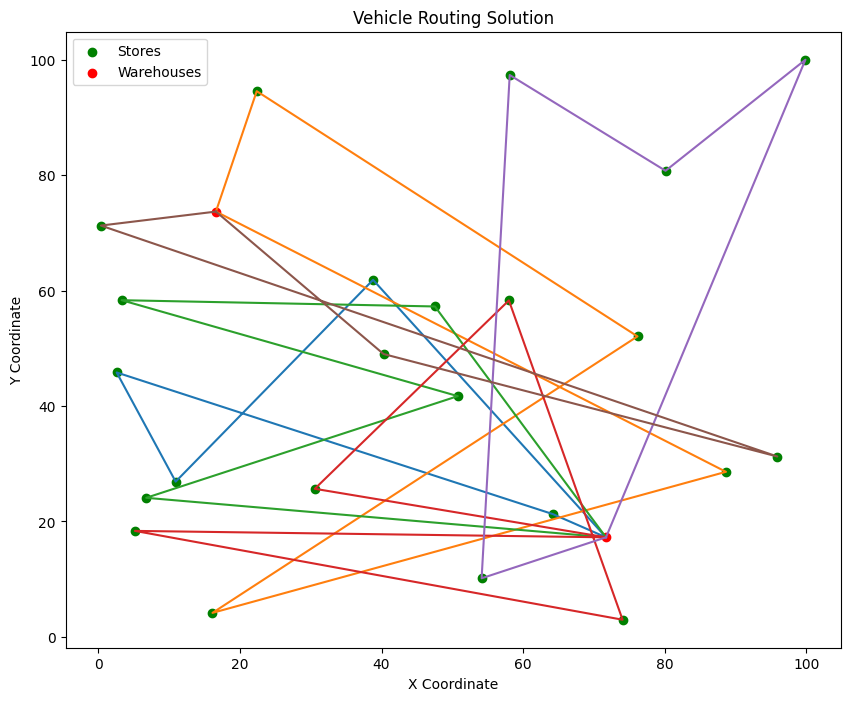

In [ ]:
start = time.time()
def calculate_distance_matrix(x_coords, y_coords):
    """
    Calculates the distance matrix between all pairs of coordinates.
    Args:
        x_coords (list): List of x coordinates
        y_coords (list): List of y coordinates.
    Returns:
            np.array: Distance matrix
    """
    coords = np.vstack((x_coords, y_coords)).T #Stack the coordinates into a matrix
    return np.round(np.sqrt((np.square(coords[:, np.newaxis] - coords).sum(axis=2)))) #A rounded figure of the sqrt of the pairwise squared distances

distance_matrix = calculate_distance_matrix(x_cord, y_cord)

def generate_random_solution(n_stores, vehicle_capacities, warehouse_indices):
    """
    Generates a random solution for the vehicle routing problem.
    Args:
        n_stores (int): Number of stores.
        vehicle_capacities (list): List of vehicle capacities.
        warehouse_indices (list): List of warehouse indices.
    Returns:
          list: List of vehicle routes.
    """
    stores = list(range(n_stores)) #Create a list of stores
    random.shuffle(stores) #Shuffle stores
    solution = [] #Create an empty list for vehicle routes
    for capacity in vehicle_capacities: #Iterate over the vehicle capacities
        for _ in range(n_stores // capacity): #Iterate over the number of vehicles with the given capacity
            start_warehouse = random.choice(warehouse_indices) #Choose a random starting warehouse
            end_warehouse = start_warehouse  # Set the ending warehouse to be the same as the starting warehouse
            vehicle_route = [start_warehouse] + stores[:capacity] + [end_warehouse] #Create a vehicle route with the starting warehouse, stores and ending warehouse
            stores = stores[capacity:] #Remove the stores from the list of stores
            if vehicle_route:
                solution.append(vehicle_route) #If the vehicle route is not empty, add it to the solution
    return solution

def calculate_fitness(solution, distance_matrix, vehicle_costs):
    """
    Calculates the fitness of a solution.
    Args:
        solution (list): List of vehicle routes.
        distance_matrix (np.array): Distance matrix.
        vehicle_costs (list): List of vehicle costs.
    Returns:
        float: Fitness value.
    """
    total_cost = 0 #Initialise total cost to 0
    for vehicle_route in solution:
        route_cost = 0 #Initialise route cost to 0
        vehicle_type = 0 if len(vehicle_route) <= 6 else 1 #Determine the vehicle type based on the length of the route
        if vehicle_route:
            for i in range(len(vehicle_route) - 1): #Calculate the distance traveled by the vehicle
                route_cost += distance_matrix[vehicle_route[i]][vehicle_route[i + 1]]
        total_cost += route_cost * vehicle_costs[vehicle_type] #Add the cost of the vehicle route to the total cost
    return total_cost


def hill_climb(distance_matrix, n_stores, vehicle_capacities, warehouse_indices, vehicle_costs, n_iterations=5000000):
    """
    Hill climbing algorithm for solving the vehicle routing problem.
    Args:
        distance_matrix: A matrix of distances between all stores.
        n_stores: The number of stores.
        vehicle_capacities: The capacities of the vehicles.
        warehouse_indices: A list of the warehouse indices.
        vehicle_costs: A list of the vehicle costs.
        n_iterations: The number of iterations to run the algorithm for.
    Returns:
        A tuple of the best solution, the best fitness, and the start and end counts for each warehouse.
    """
    current_solution = generate_random_solution(n_stores, vehicle_capacities, warehouse_indices) # Generate a random solution
    current_fitness = calculate_fitness(current_solution, distance_matrix, vehicle_costs) # Calculate the fitness of the current solution
    best_solution = current_solution # Set the best solution to current solution
    best_fitness = current_fitness # Set fitness to the current fitness

    for _ in range(n_iterations): # Iterate over the number of iterations
        while True: # While the current fitness is not the best fitness
            neighbor_solutions = generate_neighbor_solutions(current_solution) # Generate neighbor solutions
            for neighbor_solution in neighbor_solutions: # For each neighbor solutio
                neighbor_fitness = calculate_fitness(neighbor_solution, distance_matrix, vehicle_costs). # Calculate the fitness of the neighbor solution
                if neighbor_fitness < best_fitness: # If the neighbor fitness is less than the best fitness
                    best_solution = neighbor_solution # Set the best solution to neighbour solution
                    best_fitness = neighbor_fitness #  Set fitness to the neighbor fitness

            if best_fitness == current_fitness: # If the best fitness is equal to the current fitness
                break                           # break out of the loop
            else:
                current_solution = best_solution # Else set the current solution to best solution
                current_fitness = best_fitness   # and set current fitness to the best fitness

     # Count the number of vehicles starting and ending at each warehouse
    start_end_counts = {warehouse: {'start': 0, 'end': 0} for warehouse in warehouse_indices}
    for vehicle_route in best_solution:
        start_warehouse = vehicle_route[0] # Get the start for the route
        end_warehouse = vehicle_route[-1] # Get the end for the route
        start_end_counts[start_warehouse]['start'] += 1 # Increment the start count for the start warehouse
        start_end_counts[end_warehouse]['end'] += 1 # Increment the end count for the end warehouse

    return best_solution, best_fitness, start_end_counts

# Generate a random neighbor solution by swapping two stores between two random vehicle routes
def generate_neighbor_solutions(solution):
    """
    Generate a list of neighbor solutions by swapping two stores between two random vehicle routes.

    Args:
        solution: The current solution.

    Returns:
        A list of neighbor solutions.
    """
    neighbor_solutions = [] # Create an empty list of neighbor solutions
    for i in range(len(solution)): # Iterate over each route in the solution
        # Swap two stores in the same vehicle route
        if len(solution[i]) > 4: # If the vehicle route has more than 4 stores
            idx1, idx2 = random.sample(range(1, len(solution[i]) - 1), 2) # Randomly select two stores to swap
            neighbor_solution = solution.copy() # Create a copy of the solution
            neighbor_solution[i][idx1], neighbor_solution[i][idx2] = neighbor_solution[i][idx2], neighbor_solution[i][idx1]  # Swap the two stores in the copy of the solution
            neighbor_solutions.append(neighbor_solution) # Add the neighbor solution to the list of neighbor solutions
        # Swap two stores between different vehicle routes
        else:
            idx1 = random.randint(0, len(solution) - 1) # Generate two random indices to swap stores between two routes
            idx2 = random.randint(0, len(solution) - 1)
            neighbor_solution = solution.copy() # Create a copy of the solution
            neighbor_solution[idx1][1:-1], neighbor_solution[idx2][1:-1] = neighbor_solution[idx2][1:-1], neighbor_solution[idx1][1:-1] # Swap the stores between the two routes, excluding the first and last positions (warehouse)
            neighbor_solutions.append(neighbor_solution) # Add the neighbor solution to the list

    return neighbor_solutions


n_stores = len(x_cord) - 2
vehicle_capacities = [4, 16]
warehouse_indices = [n_stores, n_stores + 1]
vehicle_costs = [1, 2]

# Run the hill climbing algorithm
best_solution, best_fitness, start_end_counts = hill_climb(distance_matrix, n_stores, vehicle_capacities, warehouse_indices, vehicle_costs)

# Print the best solution
print("Best Solution:", [['W'+str(i - 22) if i >= 23 else i+1 for i in solution] for solution in best_solution])
print("Best Fitness (Total Cost):", best_fitness)
print("Vehicles at Warehouses:")
for warehouse, counts in start_end_counts.items():
    print(f"Warehouse {warehouse + 1}: {counts['start']} starting, {counts['end']} ending")
end = time.time()
print('Runtime = ','approximately',(end-start)//60, 'mins')

# Plot the best solution
def plot_solution(x_cord, y_cord, solution):
    plt.figure(figsize=(10, 8))

    plt.scatter(x_cord[:-2], y_cord[:-2], c='green', label='Stores')
    plt.scatter(x_cord[-2:], y_cord[-2:], c='red', label='Warehouses')

    for vehicle_route in solution:
        route_x = [x_cord[i] for i in vehicle_route]
        route_y = [y_cord[i] for i in vehicle_route]
        if len(vehicle_route) <= 6:
            plt.plot(route_x, route_y)
        else:
            plt.plot(route_x, route_y)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Solution')
    plt.legend()
    plt.show()

plot_solution(x_cord, y_cord, best_solution)

### Simulated anneling

<ipython-input-18-13a6c6ffeb7b>:68: RuntimeWarning: overflow encountered in scalar divide
  probability = np.exp(-delta_fitness / temperature)


Best Solution: [['W1', 16, 11, 3, 2, 'W1'], ['W2', 7, 23, 10, 13, 'W2'], ['W1', 8, 15, 6, 20, 'W1'], ['W1', 18, 9, 22, 14, 'W1'], ['W2', 4, 19, 5, 21, 'W2'], ['W1', 12, 1, 17, 'W1']]
Best Fitness (Total Cost): 999.0
Vehicles at Warehouses:
Warehouse 24: 4 starting, 4 ending
Warehouse 25: 2 starting, 2 ending
Runtime =  approximately 2.0 mins


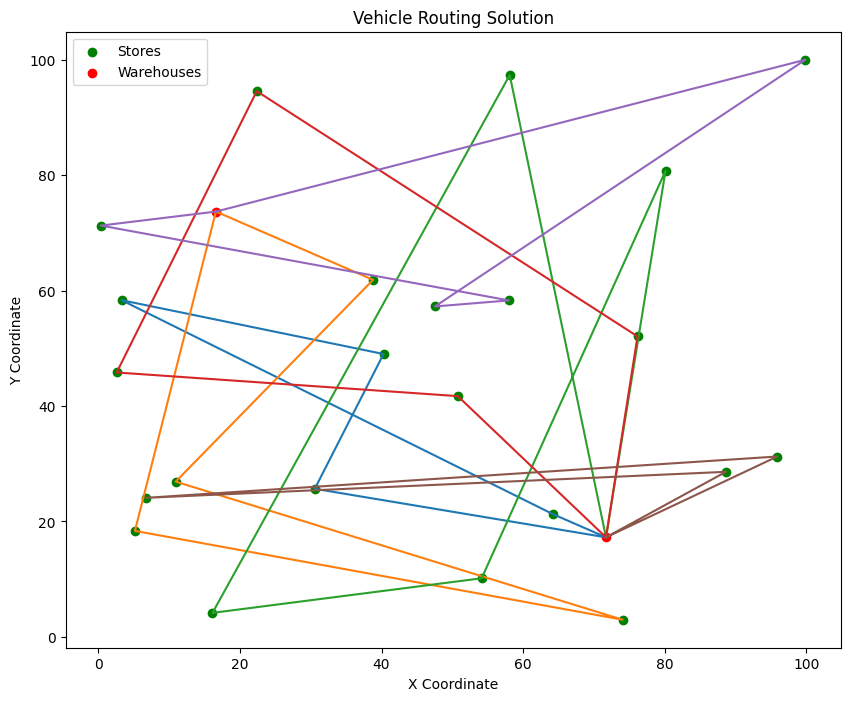

In [ ]:
start = time.time()
def calculate_distance_matrix(x_coords, y_coords):
    """
    Calculates the distance matrix between all pairs of coordinates.
    Args:
        x_coords (list): List of x coordinates
        y_coords (list): List of y coordinates.
    Returns:
            np.array: Distance matrix
    """
    coords = np.vstack((x_coords, y_coords)).T #Stack the coordinates into a matrix
    return np.round(np.sqrt((np.square(coords[:, np.newaxis] - coords).sum(axis=2)))) #A rounded figure of the sqrt of the pairwise squared distances

distance_matrix = calculate_distance_matrix(x_cord, y_cord)

def generate_random_solution(n_stores, vehicle_capacities, warehouse_indices):
    """
    Generates a random solution for the vehicle routing problem.
    Args:
        n_stores (int): Number of stores.
        vehicle_capacities (list): List of vehicle capacities.
        warehouse_indices (list): List of warehouse indices.
    Returns:
          list: List of vehicle routes.
    """
    stores = list(range(n_stores)) #Create a list of stores
    random.shuffle(stores) #Shuffle stores
    solution = [] #Create an empty list for vehicle routes
    for capacity in vehicle_capacities: #Iterate over the vehicle capacities
        for _ in range(n_stores // capacity): #Iterate over the number of vehicles with the given capacity
            start_warehouse = random.choice(warehouse_indices) #Choose a random starting warehouse
            end_warehouse = start_warehouse  # Set the ending warehouse to be the same as the starting warehouse
            vehicle_route = [start_warehouse] + stores[:capacity] + [end_warehouse] #Create a vehicle route with the starting warehouse, stores and ending warehouse
            stores = stores[capacity:] #Remove the stores from the list of stores
            if vehicle_route:
                solution.append(vehicle_route) #If the vehicle route is not empty, add it to the solution
    return solution

def calculate_fitness(solution, distance_matrix, vehicle_costs):
    """
    Calculates the fitness of a solution.
    Args:
        solution (list): List of vehicle routes.
        distance_matrix (np.array): Distance matrix.
        vehicle_costs (list): List of vehicle costs.
    Returns:
        float: Fitness value.
    """
    total_cost = 0 #Initialise total cost to 0
    for vehicle_route in solution:
        route_cost = 0 #Initialise route cost to 0
        vehicle_type = 0 if len(vehicle_route) <= 6 else 1 #Determine the vehicle type based on the length of the route
        if vehicle_route:
            for i in range(len(vehicle_route) - 1): #Calculate the distance traveled by the vehicle
                route_cost += distance_matrix[vehicle_route[i]][vehicle_route[i + 1]]
        total_cost += route_cost * vehicle_costs[vehicle_type] #Add the cost of the vehicle route to the total cost
    return total_cost

# Simulated Annealing algorithm
def simulated_annealing(distance_matrix, n_stores, vehicle_capacities, warehouse_indices, vehicle_costs, initial_temperature=100, cooling_rate=0.99, n_iterations=5000000):

    # Generate a random initial solution
    current_solution = generate_random_solution(n_stores, vehicle_capacities, warehouse_indices)

    # Calculate the initial fitness
    current_fitness = calculate_fitness(current_solution, distance_matrix, vehicle_costs)

    # Set the initial temperature
    temperature = initial_temperature

    # Iterate over the specified number of iterations
    for i in range(n_iterations):

        # Generate a random neighbor solution
        neighbor_solution = generate_neighbor_solution(current_solution)

        # Calculate the fitness of the neighbor solution
        neighbor_fitness = calculate_fitness(neighbor_solution, distance_matrix, vehicle_costs)

        # Calculate the difference in fitness between the current and neighbor solutions
        delta_fitness = neighbor_fitness - current_fitness


        # If the neighbor solution is better than the current solution, accept it
        if delta_fitness < 0:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

        # If the neighbor solution is worse than the current solution, accept it with a probability that depends on the temperature
        else:
            probability = np.exp(-delta_fitness / temperature)
            if random.random() < probability:
                current_solution = neighbor_solution
                current_fitness = neighbor_fitness

        # Cool down the temperature
        temperature *= cooling_rate

      # Count the number of vehicles starting and ending at each warehouse
    start_end_counts = {warehouse: {'start': 0, 'end': 0} for warehouse in warehouse_indices} #Calculate the number of vehicles starting and ending at each warehouse
    for vehicle_route in current_solution:
        start_warehouse = vehicle_route[0] # Get the starting warehouse for the current route
        end_warehouse = vehicle_route[-1] # Get the end warehouse for the current route
        start_end_counts[start_warehouse]['start'] += 1 #Increment the number of vehicles starting at the start warehouse
        start_end_counts[end_warehouse]['end'] += 1 # Increment the number of vehicles ending at the end warehouse
    # Return the best solution found

    return current_solution, current_fitness, start_end_counts

# Generate a random neighbor solution by swapping two stores between two random vehicle routes
def generate_neighbor_solution(solution):
    # Choose two random vehicle routes
    idx1, idx2 = random.sample(range(len(solution)), 2)

    # Choose two random stores from the chosen routes
    idx3 = random.randint(1, len(solution[idx1]) - 2)
    idx4 = random.randint(1, len(solution[idx2]) - 2)

    # Swap the two stores
    solution[idx1][idx3], solution[idx2][idx4] = solution[idx2][idx4], solution[idx1][idx3]

    return solution

# Define the input parameters
n_stores = len(x_cord) - 2
vehicle_capacities = [4, 16]
warehouse_indices = [n_stores, n_stores + 1]
vehicle_costs = [1, 2]

# Run the simulated annealing algorithm
best_solution, best_fitness, start_end_counts = simulated_annealing(distance_matrix, n_stores, vehicle_capacities, warehouse_indices, vehicle_costs)

# Print the best solution
print("Best Solution:", [['W'+str(i - 22) if i >= 23 else i+1 for i in solution] for solution in best_solution])
print("Best Fitness (Total Cost):", best_fitness)
print("Vehicles at Warehouses:")
for warehouse, counts in start_end_counts.items():
    print(f"Warehouse {warehouse + 1}: {counts['start']} starting, {counts['end']} ending")
end = time.time()
print('Runtime = ','approximately',(end-start)//60, 'mins')

# Plot the best solution
def plot_solution(x_cord, y_cord, solution):
    plt.figure(figsize=(10, 8))

    plt.scatter(x_cord[:-2], y_cord[:-2], c='green', label='Stores')
    plt.scatter(x_cord[-2:], y_cord[-2:], c='red', label='Warehouses')

    for vehicle_route in solution:
        route_x = [x_cord[i] for i in vehicle_route]
        route_y = [y_cord[i] for i in vehicle_route]
        if len(vehicle_route) <= 6:
            plt.plot(route_x, route_y)
        else:
            plt.plot(route_x, route_y)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Solution')
    plt.legend()
    plt.show()

plot_solution(x_cord, y_cord, best_solution)

### Genetic Algorithm

Best Solution: [['W2', 1, 9, 13, 7, 'W2'], ['W1', 12, 23, 20, 21, 'W1'], ['W1', 16, 15, 10, 14, 'W1'], ['W1', 5, 18, 17, 6, 'W1'], ['W2', 19, 2, 11, 8, 'W2'], ['W2', 3, 22, 4, 'W2']]
Best Fitness (Total Cost): 979.0
Vehicles at Warehouses:
Warehouse 24: 3 starting, 3 ending
Warehouse 25: 3 starting, 3 ending
Runtime =  approximately 42.0 mins


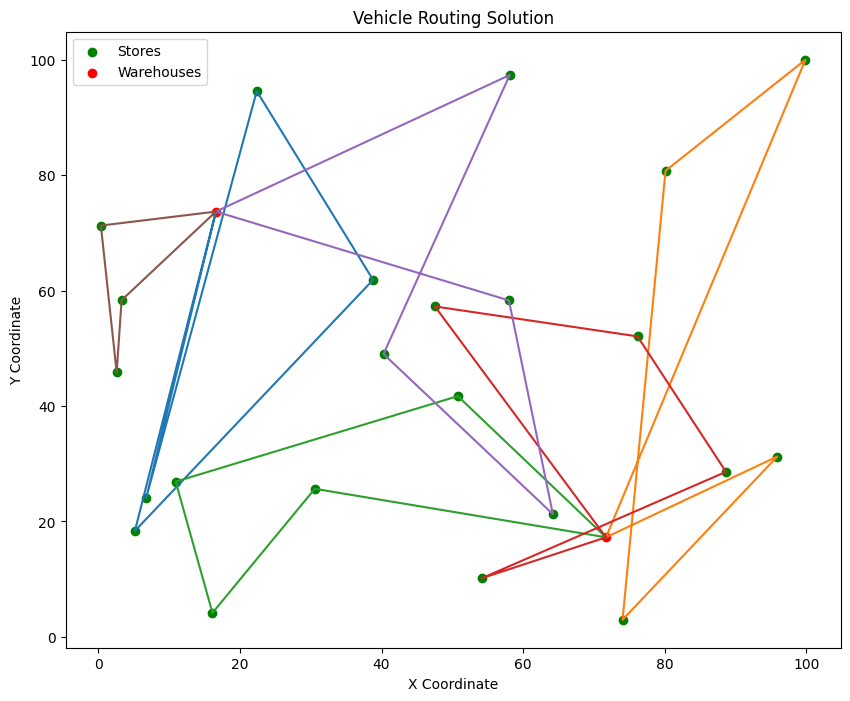

In [ ]:
start = time.time()
def calculate_distance_matrix(x_coords, y_coords):
    """
    Calculates the distance matrix between all pairs of coordinates.
    Args:
        x_coords (list): List of x coordinates
        y_coords (list): List of y coordinates.
    Returns:
            np.array: Distance matrix
    """
    coords = np.vstack((x_coords, y_coords)).T #Stack the coordinates into a matrix
    return np.round(np.sqrt((np.square(coords[:, np.newaxis] - coords).sum(axis=2)))) #A rounded figure of the sqrt of the pairwise squared distances

distance_matrix = calculate_distance_matrix(x_cord, y_cord)

def generate_random_solution(n_stores, vehicle_capacities, warehouse_indices):
    """
    Generates a random solution for the vehicle routing problem.
    Args:
        n_stores (int): Number of stores.
        vehicle_capacities (list): List of vehicle capacities.
        warehouse_indices (list): List of warehouse indices.
    Returns:
          list: List of vehicle routes.
    """
    stores = list(range(n_stores)) #Create a list of stores
    random.shuffle(stores) #Shuffle stores
    solution = [] #Create an empty list for vehicle routes
    for capacity in vehicle_capacities: #Iterate over the vehicle capacities
        for _ in range(n_stores // capacity): #Iterate over the number of vehicles with the given capacity
            start_warehouse = random.choice(warehouse_indices) #Choose a random starting warehouse
            end_warehouse = start_warehouse  # Set the ending warehouse to be the same as the starting warehouse
            vehicle_route = [start_warehouse] + stores[:capacity] + [end_warehouse] #Create a vehicle route with the starting warehouse, stores and ending warehouse
            stores = stores[capacity:] #Remove the stores from the list of stores
            if vehicle_route:
                solution.append(vehicle_route) #If the vehicle route is not empty, add it to the solution
    return solution

def crossover(parent1, parent2, n_stores, warehouse_indices):
    """
    Crossover operator for the vehicle routing problem.
    Args:
        parent1 (list): First parent solution.
        parent2 (list): Second parent solution.
        n_stores (int): Number of stores.
        warehouse_indices (list): List of warehouse indices.
    Returns:
        list: Offspring solution.
    """
    all_routes = list(set(tuple(route) for route in parent1 + parent2)) #Create a set of all the routes in the two parents
    random.shuffle(all_routes) #Shuffle the set of routes
    offspring = [] #Create a list of offspring solutions
    covered_stores = set() #Create a set of covered stores
    for route in all_routes: #Iterate over the routes in the offspring
        if not covered_stores.issuperset(set(route) - set(warehouse_indices)):
            offspring.append(list(route))
            covered_stores.update(set(route) - set(warehouse_indices)) #If the route does not contain any uncovered stores, add it to the offspring
        if len(covered_stores) == n_stores:
            break                   # If all stores have been covered, break

    missing_stores = set(range(n_stores)) - covered_stores #Create a set of missing stores

    if missing_stores:   #If there are any missing stores, add them to the offspring
        for store in missing_stores:
            for route in offspring:
                if len(route) - 2 < max(vehicle_capacities):  #If the route has capacity to add a store, add the store to the route
                    route.insert(-1, store)
                    covered_stores.add(store)
                    break
            if len(covered_stores) == n_stores:  #If all stores have been covered, break
                break

    fitness_offspring = calculate_fitness(offspring, distance_matrix, vehicle_costs) #Calculate the fitness of the offspring
    fitness_parent1 = calculate_fitness(parent1, distance_matrix, vehicle_costs) #Calculate the fitness of the parents
    fitness_parent2 = calculate_fitness(parent2, distance_matrix, vehicle_costs)

    if (fitness_offspring < fitness_parent1) and (fitness_offspring < fitness_parent2): #If the offspring is better than both parents, return offspring
        return offspring
    elif fitness_parent1 < fitness_parent2:  #Otherwise, return better parent
        return parent1
    else:
        return parent2

    print(fitness_offspring, parent1_offspring, parent2_offspring)

    # return offspring



def calculate_fitness(solution, distance_matrix, vehicle_costs):
    """
    Calculates the fitness of a solution.
    Args:
        solution (list): List of vehicle routes.
        distance_matrix (np.array): Distance matrix.
        vehicle_costs (list): List of vehicle costs.
    Returns:
        float: Fitness value.
    """
    total_cost = 0 #Initialise total cost to 0
    for vehicle_route in solution:
        route_cost = 0 #Initialise route cost to 0
        vehicle_type = 0 if len(vehicle_route) <= 6 else 1 #Determine the vehicle type based on the length of the route
        if vehicle_route:
            for i in range(len(vehicle_route) - 1): #Calculate the distance traveled by the vehicle
                route_cost += distance_matrix[vehicle_route[i]][vehicle_route[i + 1]]
        total_cost += route_cost * vehicle_costs[vehicle_type] #Add the cost of the vehicle route to the total cost
    return total_cost

def mutate(solution, mutation_rate):
    """
    Mutation operator for the vehicle routing problem.
    Args:
        solution (list): Solution to be mutated.
        mutation_rate (float): Mutation rate.

    Returns:
        list: Mutated solution.
    """
    for vehicle_route in solution: #Iterate over the vehicle routes
        if random.random() < mutation_rate:  #If a random number is less than the mutation rate, swap two random stores in the route
            i, j = random.sample(range(1, len(vehicle_route) - 1), 2)
            vehicle_route[i], vehicle_route[j] = vehicle_route[j], vehicle_route[i]
    return solution


def genetic_algorithm(distance_matrix, n_generations, n_population, n_stores, \
                      vehicle_capacities, warehouse_indices, vehicle_costs, mutation_rate, crossover_rate):
    """
    Genetic algorithm for the vehicle routing problem.
    Args:
        distance_matrix (np.array): Distance matrix.
        n_generations (int): Number of generations.
        n_population (int): Number of individuals in the population.
        n_stores (int): Number of stores.
        vehicle_capacities (list): List of vehicle capacities.
        warehouse_indices (list): List of warehouse indices.
        vehicle_costs (list): List of vehicle costs.
        mutation_rate (float): Mutation rate.
        crossover_rate (float): Crossover rate

    Returns:
        list: Best solution.
        float: Best fitness.
        dict: Start and end counts for each warehouse.
    """
    #Create a population of random solutions
    population = [generate_random_solution(n_stores, vehicle_capacities, warehouse_indices) for _ in range(n_population)]

    best_solution = None #Initialize the best solution)
    best_fitness = float('inf') #Initialize best fitness

    for gen_i in range(n_generations): #Iterate over the generations
        n_population = len(population)
        population_fitness = [calculate_fitness(sol, distance_matrix, vehicle_costs) for sol in population] #Calculate the fitness of each solutions in the population


        new_population = [] #Create new populaton
        while len(new_population) < len(population): #Iterate until the new population has the same size as the old population
            parent1, parent2 = random.sample(population, 2) #Select two parents randomly
            if random.random() < crossover_rate: #If randomly generated number is less than crossover_rate add offspring to new population
                offspring = crossover(parent1, parent2, n_stores, warehouse_indices)
                new_population.append(offspring)
            else:
                new_population.extend([parent1, parent2]) # If crossover is not performed, add both parents to the new population
        population = new_population

        for i in range(len(population)): #Mutate each solution in the new population
            population[i] = mutate(population[i], mutation_rate)

        for sol in population: #Calculate the fitness of each solution in the new population
            fitness = calculate_fitness(sol, distance_matrix, vehicle_costs)
            if fitness < best_fitness:
                best_fitness = fitness
                best_solution = sol
        #print(f'Generation {gen_i}: Best cost: {best_fitness}: Population size: {len(population)}')

    start_end_counts = {warehouse: {'start': 0, 'end': 0} for warehouse in warehouse_indices} #Calculate the number of vehicles starting and ending at each warehouse
    for vehicle_route in best_solution:
        start_warehouse = vehicle_route[0] # Get the starting warehouse for the current route
        end_warehouse = vehicle_route[-1] # Get the end warehouse for the current route
        start_end_counts[start_warehouse]['start'] += 1  #Increment the number of vehicles starting at the start warehouse
        start_end_counts[end_warehouse]['end'] += 1 # Increment the number of vehicles ending at the end warehouse

    return best_solution, best_fitness, start_end_counts


n_stores = len(x_cord) - 2
vehicle_capacities = [4, 16]
warehouse_indices = [n_stores, n_stores + 1]
vehicle_costs = [1, 2]

mutation_rate = 0.7

crossover_rate = 0.7

best_solution, best_fitness, start_end_counts = genetic_algorithm(distance_matrix, n_generations=5000, n_population=5000, n_stores=n_stores, vehicle_capacities=vehicle_capacities, warehouse_indices=warehouse_indices, vehicle_costs=vehicle_costs, mutation_rate=mutation_rate, crossover_rate=crossover_rate)
print("Best Solution:", [['W'+str(i - 22) if i >= 23 else i+1 for i in solution] for solution in best_solution])
print("Best Fitness (Total Cost):", best_fitness)
print("Vehicles at Warehouses:")
for warehouse, counts in start_end_counts.items():
    print(f"Warehouse {warehouse + 1}: {counts['start']} starting, {counts['end']} ending")
end = time.time()
print('Runtime = ','approximately',(end-start)//60, 'mins')


def plot_solution(x_cord, y_cord, solution):
    plt.figure(figsize=(10, 8))

    plt.scatter(x_cord[:-2], y_cord[:-2], c='green', label='Stores')
    plt.scatter(x_cord[-2:], y_cord[-2:], c='red', label='Warehouses')

    for vehicle_route in solution:
        route_x = [x_cord[i] for i in vehicle_route]
        route_y = [y_cord[i] for i in vehicle_route]
        if len(vehicle_route) <= 6:
            plt.plot(route_x, route_y)
        else:
            plt.plot(route_x, route_y)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Solution')
    plt.legend()
    plt.show()

plot_solution(x_cord, y_cord, best_solution)